In [0]:
# Basic import and reading dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

reviews_df_main = pd.read_excel("RC.xlsx")
reviews_df = pd.DataFrame()

In [24]:
#extracting parts of dataframe that we need into new dataframe
reviews_df['review'] = reviews_df_main["Review"]
reviews_df['OTA'] = reviews_df_main['OTA']
reviews_df["revrating"] = reviews_df_main["Review Rating"]
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 3 columns):
review       2247 non-null object
OTA          2247 non-null object
revrating    2135 non-null float64
dtypes: float64(1), object(2)
memory usage: 52.8+ KB


In [25]:
#cleaning and filtering
reviews_df.dropna(inplace= True)

reviews_df["review"] = [x.replace("\n", " ") for x in reviews_df["review"] ]
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 0 to 2246
Data columns (total 3 columns):
review       2135 non-null object
OTA          2135 non-null object
revrating    2135 non-null float64
dtypes: float64(1), object(2)
memory usage: 66.7+ KB


In [26]:
# return the wordnet object value corresponding to the POS tag
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review"] = reviews_df["review"].apply(lambda x : str(x))
reviews_df["review_clean"] = reviews_df['review'].apply(lambda x: clean_text(x))
reviews_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,review,OTA,revrating,review_clean
0,"Hello all, I am writing a review on Makemytrip...",MMT,4.0,hello write review makemytrip.com reference ex...
1,"Hello Friends, I have booked a room in Raddiso...",MMT,1.0,hello friend book room raddison atrium banglor...
2,I was trying to book an intl flight for 4 pass...,MMT,3.0,try book intl flight passenger chennai bangkok...
3,Unbeatable match with other trip booking apps ...,MMT,3.0,unbeatable match trip book apps trust worthy a...
4,They cannot be reliable in matter of hotel boo...,MMT,1.0,cannot reliable matter hotel booking happen ha...


In [27]:
# add sentiment anaylsis columns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)
reviews_df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,OTA,revrating,review_clean,neg,neu,pos,compound
0,"Hello all, I am writing a review on Makemytrip...",MMT,4.0,hello write review makemytrip.com reference ex...,0.000,0.785,0.215,0.9970
1,"Hello Friends, I have booked a room in Raddiso...",MMT,1.0,hello friend book room raddison atrium banglor...,0.097,0.860,0.043,-0.4435
2,I was trying to book an intl flight for 4 pass...,MMT,3.0,try book intl flight passenger chennai bangkok...,0.019,0.807,0.173,0.9412
3,Unbeatable match with other trip booking apps ...,MMT,3.0,unbeatable match trip book apps trust worthy a...,0.000,0.729,0.271,0.9837
4,They cannot be reliable in matter of hotel boo...,MMT,1.0,cannot reliable matter hotel booking happen ha...,0.000,0.954,0.046,0.4310


In [0]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

No handles with labels found to put in legend.


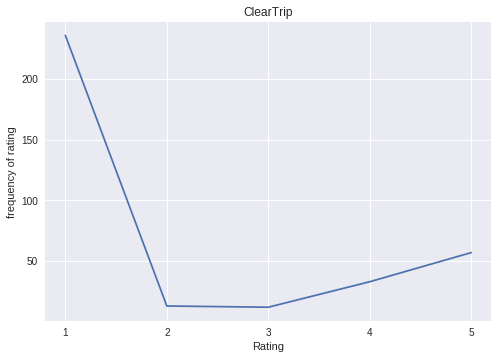

No handles with labels found to put in legend.


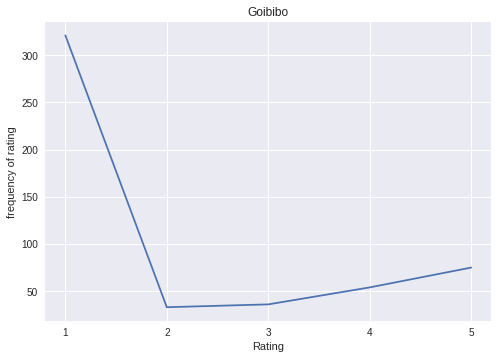

No handles with labels found to put in legend.


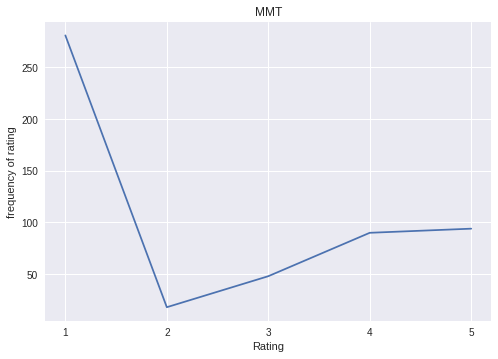

No handles with labels found to put in legend.


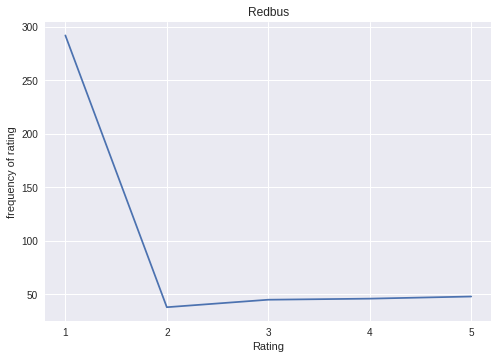

No handles with labels found to put in legend.


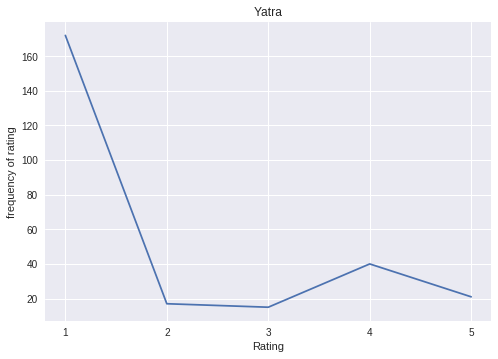

In [22]:
#OTA selection
OTAs = ["ClearTrip" , "Goibibo" , "MMT" , "Redbus" , "Yatra"]
for OTA in OTAs:

  reviews_OTA_df = reviews_df[reviews_df["OTA"] == OTA ]
  totalCountRating = reviews_OTA_df.groupby('revrating').count()["OTA"]
  totalCountRating = [totalCountRating[i] for i in range(1,6) ]
  rating_sentiments = reviews_OTA_df.groupby('revrating').mean()["compound"]
  ratings=['1','2','3','4','5']
  sentiment=[rating_sentiments[i] for i in range(1,6) ]
  xpos = np.arange(1,len(ratings)+1)
  #plt.bar(xpos,sentiment, label="sentiments")
  plt.plot(xpos, totalCountRating)
  #plt.plot(xpos, totalCountRating)

  plt.xlabel("Rating")
  plt.ylabel("frequency of rating")
  plt.title(OTA)
  
  plt.xticks(xpos,ratings)
  plt.savefig(OTA+" review frequency to review rating", dpi = 200)
  plt.show()



In [0]:
from google.colab import files
for OTA in OTAs:
  files.download(OTA+" AVG sentiment to review rating")

In [29]:
#reviews_df[reviews_df["revrating"] == 4.0].count()
totalCountRating = reviews_df.groupby('revrating').count()["OTA"]
totalCountRating = [totalCountRating[i] for i in range(1,6) ]
totalCountRating

[1302, 119, 156, 263, 295]

In [30]:
rating_sentiments = reviews_df.groupby('revrating').mean()["compound"]
rating_sentiments 

revrating
1.0   -0.353030
2.0   -0.207608
3.0    0.456484
4.0    0.814815
5.0    0.810587
Name: compound, dtype: float64

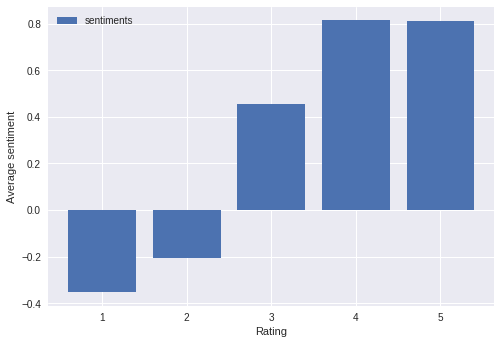

In [32]:


ratings=['1','2','3','4','5']
sentiment=[rating_sentiments[i] for i in range(1,6) ]
xpos = np.arange(1,len(ratings)+1)
plt.bar(xpos,sentiment, label="sentiments")
#plt.plot(xpos, totalCountRating)

plt.xlabel("Rating")
plt.ylabel("Average sentiment")
#plt.title('Sentiment of reviews')
plt.savefig("Overall Average sentiment to review rating", dpi = 200)
plt.legend()

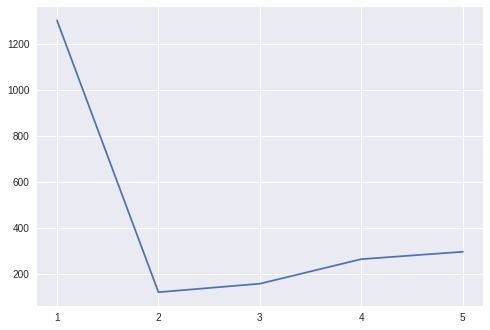

In [34]:
plt.plot(xpos, totalCountRating)
plt.xticks(xpos,ratings)
plt.savefig("Overall review frequency to review rating", dpi = 200)
plt.show()